In [25]:
#Load packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
from matplotlib import font_manager

In [79]:
# Load data from worldometers.info and fifa.com
df = pd.read_csv('/Users/julianball/Downloads/WorldRankings - Sheet1.csv')

# Drop any rows with missing values and convert rankings to integers
df = df.dropna()
rankings = ["FIFA Men's Ranking", "FIFA Women's Ranking", "FIBA Basketball Ranking", "GDP Ranking", "Population Ranking"]
df[rankings] = df[rankings].astype(int)
df.head()

,Team,FIFA Men's Ranking,FIFA Women's Ranking,Population,Population Ranking,FIBA Basketball Ranking,GDP Ranking,GDP
0,Argentina,1,33,45851378.0,35,8,22,6.460750e+11
1,Spain,2,2,47889958.0,32,5,15,1.620090e+12
2,France,3,11,66650804.0,23,4,7,3.051830e+12
4,Brazil,5,8,212812405.0,7,12,9,2.173670e+12
5,Netherlands,6,10,18346819.0,71,54,17,1.154360e+12


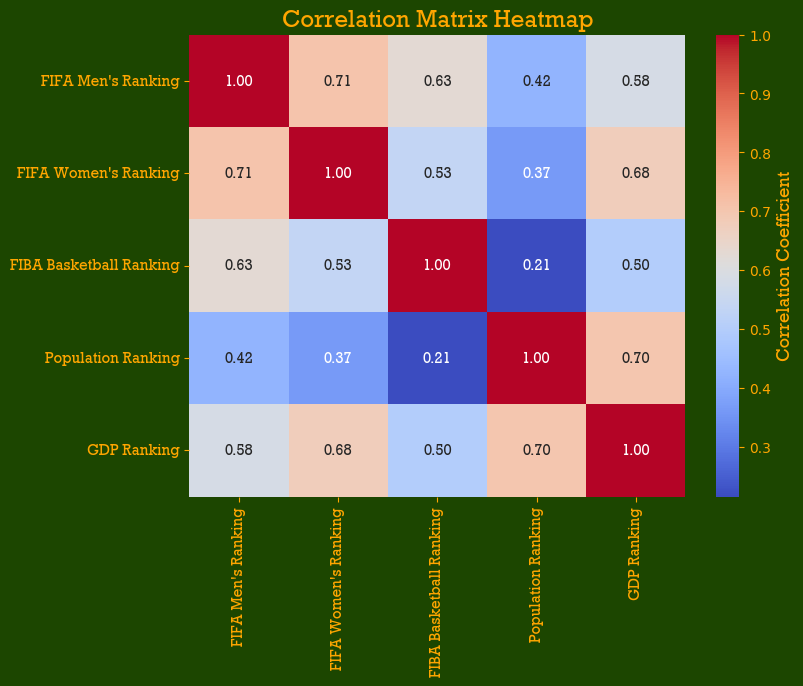

In [43]:
# Compute correlation matrix
correlation_matrix = df[[
    "FIFA Men's Ranking",
    "FIFA Women's Ranking",
    "FIBA Basketball Ranking",
    "Population Ranking",
    "GDP Ranking"
]].corr()

# Create and style the heatmap
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#1c4600')  # Background color

ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    annot_kws={"fontsize": 10, "fontweight": "bold", "family": "Rockwell"}
)

# Title styling
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', color='#ffa600', family='Rockwell')

# Axis tick styling (labels and dash marks)
ax.tick_params(axis='both', colors='#ffa600')
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_color('#ffa600')
    label.set_fontweight('bold')
    label.set_fontsize(10)
    label.set_family('Rockwell')

# Colorbar styling
colorbar = ax.collections[0].colorbar
colorbar.set_label('Correlation Coefficient', fontsize=12, fontweight='bold', color='#ffa600', family='Rockwell')
colorbar.ax.tick_params(labelcolor='#ffa600', color='#ffa600')
colorbar.outline.set_edgecolor('#ffa600')
for tick in colorbar.ax.yaxis.get_major_ticks():
    tick.tick1line.set_color('#ffa600')
    tick.tick2line.set_color('#ffa600')

# Show the plot
plt.show()


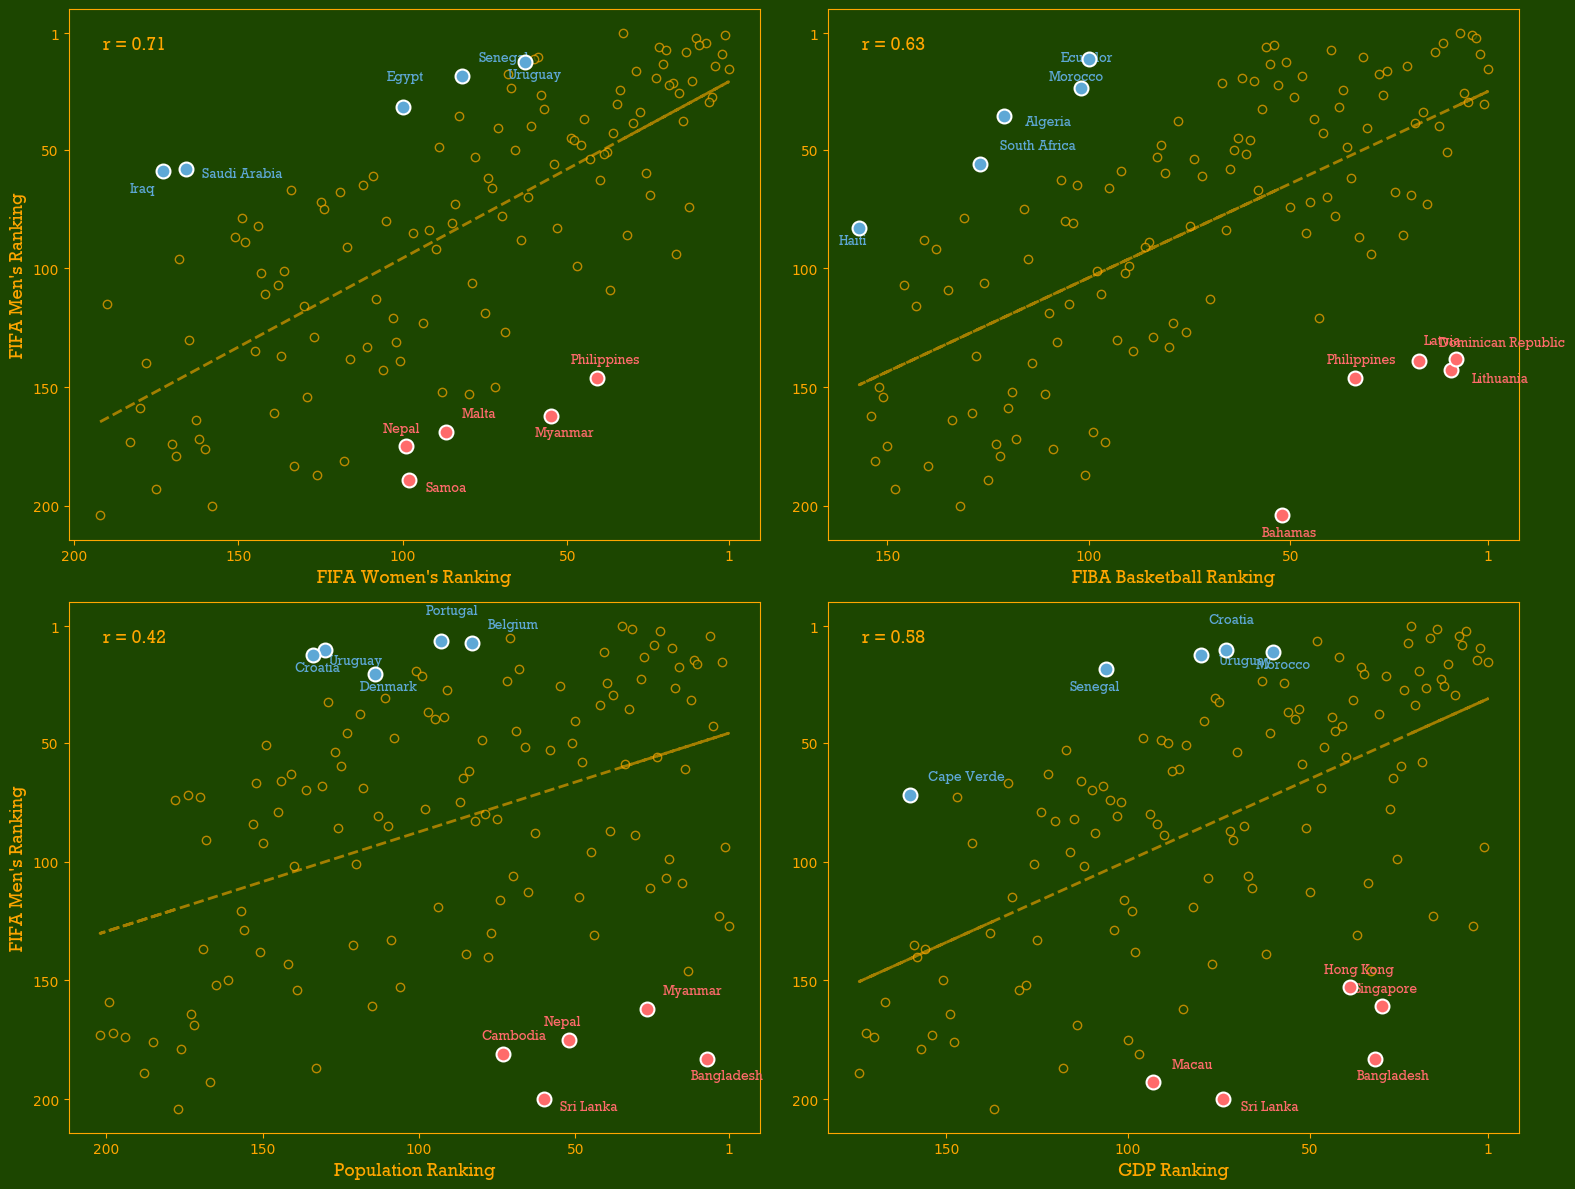

In [109]:
# Set up 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#1c4600')  # Figure background

# Define independent variables
x_vars = ["FIFA Women's Ranking",'FIBA Basketball Ranking', 'Population Ranking', 'GDP Ranking']

axs = axs.flatten()

for i, ax in enumerate(axs):
    x = df[x_vars[i]]
    y = df["FIFA Men's Ranking"]
    
    # Fit regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Scatter plot
    ax.scatter(x, y, color='#1c4600', edgecolors='#ffa600', alpha=0.7)
    ax.plot(x, regression_line, color='#ffa600', linewidth=2, linestyle='--', alpha=0.6)

    # Correlation coefficient annotation
    ax.text(0.05, 0.95,
            f"r = {r_value:.2f}",
            transform=ax.transAxes,
            fontsize=12, fontweight='bold', color='#ffa600',
            verticalalignment='top', family='Rockwell')

    # Calculate residuals and find over/underperformers
    residuals = y - regression_line
    overperformers = residuals.nsmallest(5).index
    underperformers = residuals.nlargest(5).index

    # Offsets to avoid overlapping the points, adjusted for slight movement in different directions
    overperformer_offsets = [
        (10, 10),    # First overperformer, move right and up
        (-5, 5),  # Second overperformer, move left and up
        (5, -10),   # Third overperformer, move right and down
        (-5, -5),  # Fourth overperformer, move left and down
        (5, 8)    # Fifth overperformer, move right and more up
    ]

    underperformer_offsets = [
        (5, 10),   # First underperformer, move right and up
        (-5, 6),   # Second underperformer, move left and up
        (8, -5),  # Third underperformer, move right and down
        (-5, -5), # Fourth underperformer, move left and down
        (7, -5)    # Fifth underperformer, move right and more down
    ]

    # Highlight overperformers
    for idx, (offset_x, offset_y) in zip(overperformers, overperformer_offsets):
        ax.scatter(x[idx], y[idx], edgecolors='white', facecolors='#5ea8d6', s=100, linewidth=1.5, zorder=5)
        ax.text(x[idx] + offset_x, y[idx] + offset_y, df.loc[idx, 'Team'],
                fontsize=9, color='#5ea8d6', weight='bold', ha='left', va='bottom', family='Rockwell')

    # Highlight underperformers
    for idx, (offset_x, offset_y) in zip(underperformers, underperformer_offsets):
        ax.scatter(x[idx], y[idx], edgecolors='white', facecolors='#ff6b6b', s=100, linewidth=1.5, zorder=5)
        ax.text(x[idx] + offset_x, y[idx] + offset_y, df.loc[idx, 'Team'],
                fontsize=9, color='#ff6b6b', weight='bold', ha='left', va='bottom', family='Rockwell')

    # Set labels and styles
    ax.set_xlabel(x_vars[i], fontsize=12, fontweight='bold', color='#ffa600', family='Rockwell')
    ax.set_facecolor('#1c4600')
    ax.tick_params(axis='both', colors='#ffa600')

    # Set spine color
    for spine in ax.spines.values():
        spine.set_color('#ffa600')

    # Custom ticks and axis direction
    ax.set_yticks([200, 150, 100, 50, 1])
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    if i in [1, 3]:
        ax.set_xticks([150, 100, 50, 1])
    else:
        ax.set_xticks([200, 150, 100, 50, 1])

# Set y-labels for left column
axs[0].set_ylabel("FIFA Men's Ranking", fontsize=12, fontweight='bold', color='#ffa600', family='Rockwell')
axs[2].set_ylabel("FIFA Men's Ranking", fontsize=12, fontweight='bold', color='#ffa600', family='Rockwell')

plt.tight_layout()
plt.show()


In [113]:
# Calculate slope and intercept for Population Ranking vs FIFA Men's Ranking
population_slope, population_intercept, _, _, _ = linregress(df['Population Ranking'], df["FIFA Men's Ranking"])

# Calculate slope and intercept for GDP Ranking vs FIFA Men's Ranking
gdp_slope, gdp_intercept, _, _, _ = linregress(df['GDP Ranking'], df["FIFA Men's Ranking"])

# Calculate slope and intercept for FIFA Women's Ranking vs FIFA Men's Ranking
fifa_women_slope, fifa_women_intercept, _, _, _ = linregress(df['FIFA Women\'s Ranking'], df["FIFA Men's Ranking"])

# Calculate slope and intercept for FIBA Basketball Ranking vs FIFA Men's Ranking
fiba_slope, fiba_intercept, _, _, _ = linregress(df['FIBA Basketball Ranking'], df["FIFA Men's Ranking"])

# Print results
print(f"Population Ranking Model: Slope = {population_slope:.2f}, Intercept = {population_intercept:.2f}")
print(f"GDP Ranking Model: Slope = {gdp_slope:.2f}, Intercept = {gdp_intercept:.2f}")
print(f"FIFA Women's Ranking Model: Slope = {fifa_women_slope:.2f}, Intercept = {fifa_women_intercept:.2f}")
print(f"FIBA Basketball Ranking Model: Slope = {fiba_slope:.2f}, Intercept = {fiba_intercept:.2f}")

Population Ranking Model: Slope = 0.42, Intercept = 45.58
GDP Ranking Model: Slope = 0.69, Intercept = 30.84
FIFA Women's Ranking Model: Slope = 0.75, Intercept = 20.74
FIBA Basketball Ranking Model: Slope = 0.79, Intercept = 24.79


In [9]:
# Define independent (X) and dependent (y) variables
X = df[["FIFA Women's Ranking", 'FIBA Basketball Ranking', 'Population Ranking', 'GDP Ranking']]
y = df["FIFA Men's Ranking"]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# View the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     FIFA Men's Ranking   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     49.39
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.01e-24
Time:                        20:12:53   Log-Likelihood:                -635.04
No. Observations:                 128   AIC:                             1280.
Df Residuals:                     123   BIC:                             1294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [11]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LinearRegression model and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1912.5612423395646
R-squared (R²): 0.37012996006028087
